In [1]:
%matplotlib inline

In [2]:
import nltk

def create_dict(word_list):
    word_dict = {}
    for word in word_list:
        if not word in word_dict:
            word_dict[word] = len(word_dict)
    return word_dict

raw_data = nltk.corpus.treebank.words()
word_list = [word.lower() for word in raw_data if word.isalpha()]
word_dict = create_dict(word_list)

In [3]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

def plot(data):
    plt.figure()
    plt.plot(data)

In [17]:
import torch
import torch.nn as nn
from torch.autograd import Variable
import torch.utils.data as d
import torch.nn.functional as F
import torch.optim as optim


class Skipgram(nn.Module):
    def __init__(self, hidden_size, vocab_size):
        super(Skipgram, self).__init__()
        self.embedding_layer = nn.Embedding(vocab_size, hidden_size)
        self.output_layer = nn.Linear(hidden_size, vocab_size)
        
    def forward(self, input):
        input_times_embedding = self.embedding_layer(input)
        output = self.output_layer(input_times_embedding)
        return torch.squeeze(output)
    
def train(input, labels):
    optimizer.zero_grad()
    input = Variable(input).cuda()
    output = skipgram(input)
    labels.transpose(0,1)
    loss = skipgram_loss(output, labels)
    loss.backward()
    optimizer.step()


def trainAll(sentences, context_size, word_dict):
    dataset = SkipgramDataset(sentences, context_size, word_dict)
    
    data_loader = d.DataLoader(dataset, batch_size = batch_size)
    i=0
    for _ in range(50):
        for word, label in data_loader:
            if (i%100 == 0):
                print(i)
            train(word, Variable(label).cuda())
            i+=1

# In the form
# 0 - ('a', ['I', 'am', 'purple', 'moose'])
# 1 - ('purple', ['am', 'a', 'moose', 'that'])
class SkipgramDataset(d.Dataset):
    def __init__(self, text, context_size, word_dict):
        
        # Convert all word to their indices
        indexes = [word_dict[word] for word in text]
        
        # Create word_map
        self.word_list = [(torch.LongTensor([indexes[i]]), torch.LongTensor(indexes[i-context_size: i] + indexes[i+1: i+1+context_size])) 
                         for i in range(context_size, len(text) - context_size)] 
        
    def __len__(self):
        return len(self.word_list)
    
    def __getitem__(self, i):
        return self.word_list[i]
        

    
def skipgram_loss(datapoint, label):
    total_loss = 0
    label = torch.transpose(label, 0, 1)
    for word in label:
        new_loss = F.cross_entropy(datapoint, word)
        total_loss += new_loss
    all_losses.append(total_loss.data[0])
    return total_loss
    
    
hidden_size = 300
batch_size = 1024

skipgram = nn.DataParallel(Skipgram(hidden_size, len(word_dict)).cuda())
optimizer = optim.SGD(skipgram.parameters(), lr = 0.001, momentum=0.9)
all_losses = []
context_size = 2
trainAll(word_list, context_size, word_dict)

    
        
        

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600


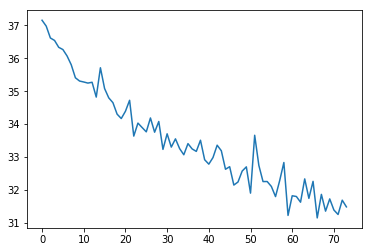

In [20]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

plt.figure()
plt.plot(all_losses[0:-1:50])

In [163]:
print(all_losses[0:-1:100])

[36.413177490234375, 35.85969543457031]


['Pierre', 'Vinken', ',', '61', 'years', 'old', ',', ...]